## Tutorial: how to import the data and visualise them

In [1]:
import numpy as np
import random
#from tree import FamilyTree
from data_handler import ParticleDataset

import matplotlib.pyplot as plt
from matplotlib.patches import Circle,ConnectionPatch

from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

INFO: Using numpy backend


### Helper function for plots

The following are functions needed to plot the geodesics between nodes. Please, just run the next cell. In the future this will be include in any py file and will be removed from here.

In [2]:
def mobius_add(x, y):
    """Mobius addition in numpy."""
    xy = np.sum(x * y, 1, keepdims=True)
    x2 = np.sum(x * x, 1, keepdims=True)
    y2 = np.sum(y * y, 1, keepdims=True)
    num = (1 + 2 * xy + y2) * x + (1 - x2) * y
    den = 1 + 2 * xy + x2 * y2
    return num / den


def mobius_mul(x, t):
    """Mobius multiplication in numpy."""
    normx = np.sqrt(np.sum(x * x, 1, keepdims=True))
    normx = np.clip(normx, 1e-12, 1-1e-3)
    return np.tanh(t * np.arctanh(normx)) * x / normx


def geodesic_fn(x, y, nb_points=100):
    """Get coordinates of points on the geodesic between x and y."""
    t = np.linspace(0, 1, nb_points)
    x_rep = np.repeat(x.reshape((1, -1)), len(t), 0)
    y_rep = np.repeat(y.reshape((1, -1)), len(t), 0)
    t1 = mobius_add(-x_rep, y_rep)
    t2 = mobius_mul(t1, t.reshape((-1, 1)))
    return mobius_add(x_rep, t2)


def plot_geodesic(x, y, ax):
    """Plots geodesic between x and y."""
    points = geodesic_fn(x, y)
    ax.plot(points[:, 0], points[:, 1], color='black', linewidth=1.5, alpha=1)

## The dataset

The dataset is structured as a Pytorch dataset. The two inputs are the path for the data directory and the signal name (this depends on the physics event we are interested in and it is chosen once the data is generated).

The dataset spits each event as dictionary which contains a graphicle object and a hyperbolic coordinates array for each of the algorithm tree (AntiKt, CA and Kt) and for the MC truth.

In [3]:
dataset = ParticleDataset('data/test2', 'signal')
event = dataset.__getitem__(1)

In [4]:
event.keys()

dict_keys(['MC_graph', 'MC_hyp', 'aKt_graph', 'aKt_hyp', 'CA_graph', 'CA_hyp', 'Kt_graph', 'Kt_hyp'])

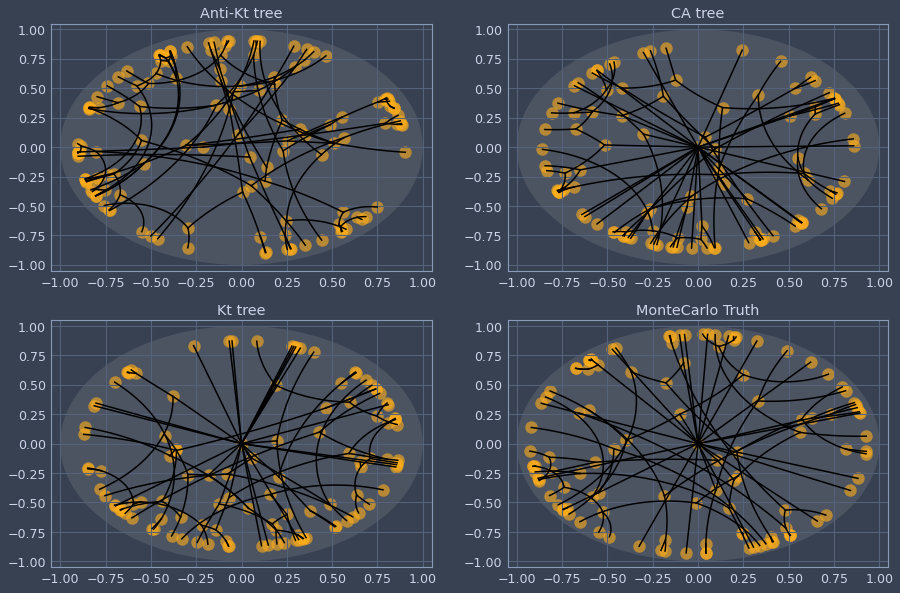

In [29]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax = ax.flatten()

keys = [k for k in event.keys()]
titles = ['Anti-Kt tree', 'CA tree', 'Kt tree', 'MonteCarlo Truth']
for k in range(0, 7, 2):
    i = k//2
    graph, hyp = event[keys[k]], event[keys[k+1]]
    
    for edge in graph.edges:
        start = np.where(graph.nodes == edge[0])[0][0]
        end = np.where(graph.nodes == edge[1])[0][0]
        x0,y0 = hyp[start]
        x1,y1 = hyp[end]
        #ax.plot([x0,x1],[y0,y1],alpha=0.1,color='black')
        plot_geodesic(hyp[start],hyp[end],ax[i])
    
    #number_of_colors = len(hyp)
    #color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    #         for i in range(number_of_colors)]
    ax[i].scatter(hyp[:,0], hyp[:,1], c='orange', s=150, alpha=0.6)
    
    disk = Circle((0,0),1,color='white',alpha=0.1)#fill=False)
    ax[i].add_patch(disk)
    ax[i].set_xlim(-1.05,1.05)
    ax[i].set_ylim(-1.05,1.05)
    ax[i].set_title(titles[i])

plt.show()
#plt.savefig('example.png')

In [13]:
#edg = np.where(graph.edges['out'] == -1)[0]
#nodes = graph.edges['in'][edg]
#idx = [np.where(graph.nodes == n)[0][0] for n in nodes]